# Secrid Type of Material trends


<span style="color: gray; font-size:1em;">March-2020</span>


## Table of Contents
* [Introduction](#introduction)
* [Section One - Import Data into IDE](#import_data)
    * [Part I - Gathering Data](#gather_data)
    * [Part II - Assessing Data](#assess_data)
    * [Part III - Cleaning Data](#clean_data)
* [Section Two - Variable Assessing](#asses_variable)   
    * [variable - type_of_material](#material)
     * [Pivot Table - type_of_material pivot table](#material_table)
* [Section Three - Leather Items](#leather_items)   
    * [variable - Miniwallet](#miniwallet) 
     * [Pivot Table - Miniwallet pivot table](#miniwallet_table)
    * [variable -Slimwallet](#slimwallet) 
     * [Pivot Table - Slimwallet pivot table](#slimwallet_table)
    * [variable - Twinwallet](#twinwallet) 
     * [Pivot Table - Twinwallet pivot table](#twinwallet_table)
    
          
    

<a id='introduction'></a>
## Introduction

SECRID is a business entity based in the Netherlands. It produces, stocks and sells designer wallets, particularly leather based wallets in more than 100 countries all over the world.

This notebook explores type of material trends


<a id='#import_data'></a>
## Section One : Import Data into IDE

<a id='gather_data'></a>
## Part I : Gathering Data

In [179]:
# load required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import read_excel
import xlsxwriter

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 8)})

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('seaborn')

import six
from datetime import datetime, timedelta

# environment settings:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)


### Load .xlxs files

In [74]:
#load sales 2015 
df1 = pd.read_excel('SECRID_DATA.xlsx',0) #load first spreadsheet of SECRID DATA.xlxs

In [75]:
# #load sales 2016 
df2 = pd.read_excel('SECRID_DATA.xlsx',1) #load second spreadsheet of SECRID DATA.xlxs

In [76]:
#load sales 2017
df3 = pd.read_excel('SECRID_DATA.xlsx',2)  #load third spreadsheet ofSECRID DATA.xlxs

In [77]:
#load sales 2018
df4 = pd.read_excel('SECRID_DATA.xlsx',3)  #load fourth spreadsheet of SECRID DATA.xlxs

In [78]:
#load sales 2019
df5 = pd.read_excel('SECRID_DATA.xlsx',4)  #load fifth spreadsheet of SECRID DATA.xlxs

In [79]:
#combine df1, df2, df3, df4 and df5  into one complete dataframe 'df' for sales data
df = pd.concat([df1, df2, df3, df4, df5]) 

<a id='assess_data'></a>
## Part II - Assessing  Data

In [ ]:
df.head() #preview first five rows

In [ ]:
df.tail() #preview last five rows

In [80]:
# Check size of the dataframe 
df.shape 

(2021470, 24)

In [ ]:
# list names of columns in dataframe
df.columns 

In [ ]:
# View info of the dataframe 
df.info()

In [ ]:
# view some of the core statistics about columns
df.describe(include='all')

In [ ]:
# check the Data types (dtypes) of each column in Dataframe
df.dtypes 

In [ ]:
# Total sum of duplicate rows
df.duplicated().sum() # returns a Boolean Series with True value for each duplicated row and sums them

In [ ]:
#return the number of unique elements in each column
print(df.nunique()) 

In [ ]:
df.count() #returns the number of non-missing values for each column or row

In [ ]:
#Total missing values(NaN) in a DataFrame
df.isnull().sum().sum()

In [ ]:
#Count number of NaN for each column in DataFrame
print(df.isnull().sum()) 

<a id='issues'></a>
**Quality issues**
 * Rename column names to have clear, descriptive names in small letters according to best practice. Column 'name' can be renamed to 'customer_name' and column 'material' can be renamed to 'type_of_material'
 * Set to columns to appropriate category data type: 'internal_id', 'document_number', 'customer_name', 'customer _category', 'retailer_role', 'shipping_country', 'item', 'display_name', 'pim_category','type_of_material', 
   'pim_colour', 'wsl', 'while_stock_lasts' and 'cardprotector_colour' 

<a id='clean_data'></a>
## Part III - Cleaning Data

In [81]:
# Create copy of original DataFrame
df_copy = df.copy()

In [82]:
#Fixing messy column names
df_copy.columns = df_copy.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [83]:
# change column names using rename function
df_copy.rename(columns={                                                 
                         'name':'customer_name',
                         'wsl_+':'wsl',
                         'material':'type_of_material' }, 
                 inplace=True)

**Test**

In [ ]:
df_copy.columns #List of column names in df_clean Dataframe

**Define**
<br>Set appropriate data types for fields mentioned in the [Quality issues](#issues) 

In [84]:
# use .astype to change data type of dataframe columns
df_copy = df_copy.astype({"internal_id":'category',"document_number":'category', "customer_name":'category', "customer_category":'category', "retailer_role":'category', "shipping_country":'category', "item":'category',"display_name":'category', "pim_category":'category', "type_of_material":'category', "pim_colour":'category',"wsl":'category', "while_stock_lasts":'category', "cardprotector_colour":'category'})

**Test**

In [ ]:
df_copy.info()

In [ ]:
# view some of the core statistics about columns
df_copy.describe(include='all')

### content structure of sales dataset
The sales data contains 24 columns (variables) and 2,021,470 rows (entries). 
This is evidence that 2,021,470  sale transactions were completed in the January 2015 – December 2019 period for SECRID business. The dataset contained features about:

* Products for sale: item, display_name, pim_category, pim_colour, type_of_material and cardprotector_colour
* The country the item was shipped to : shipping_country  
* Customer data:  customer_name, customer_category and retailer_role
* Sale transactions: internal_id, document_number, quantity, amount, amount(foreign_currency) and date


### Detected Missing Values
A null value is a value in a field that appears to be blank. A null value is a field with no value. 
The table below indicates the number and  the resulting percentage of missing values per column.This able is manually created with results from running; **df.count()** to get Value Count of non-missing values in a column and 
**print(df.isnull().sum())** which will give the count number of NaN for each column in DataFrame.

| Variable Name  | Value Count| Number Of Missing Values| % Of Missing Values
| -------------  | ------------- |------------- |-------------
| internal_id    | 2,021,470  |0 |0%
| document_number| 2,021,470  |0 |0%
| date           | 2,021,470  |0 |0%
| date_created   | 2,021,470  |0 |0%
| customer_name  | 2,021,470  |0 |0%
| customer_category  | 2,015,375  |6,095     |0.30%
| retailer_role      | 201,788    |1,819,682 |90.02%
| shipping_address_1 | 2,011,883  |9,587     |0.47%
| shipping_address_2 | 367,598    |1,653,872 |81.82%
| shipping_city      | 2,012,657  |8,813 |0.44%
| shipping_zip       | 1,990,236  |31,234|1.55%
| shipping_state/province |395,792 |1,625,678 |80.42%
| shipping_country   |2,014,891   |6,579 |0.33%
| item               | 2,021,470  |0 |0%
| display_name       | 2,021,470  |0 |0%
| quantity           | 2,021,470  |0 |0%
| amount             | 2,021,470  |0 |0%
| amount_foreign_currency | 2,021,470 |0 |0%
| type_of_material        | 1,941,770 |79,700 |3.94%
| pim_category            | 1,944,252 |77,218 |3.82%
| pim_colour              | 1,933,547 |87,923|4.35%
| wsl_+                   | 2,021,470 |0     |0%
| while_stock_lasts       | 2,021,470 |0     |0%
| cardprotector_colour    | 1,877,516 |143,954 |7.12%




<a id='asses_variable'></a>
## Section Two: type of material variable assesment

<a id='material'></a>
### VARIABLE : type_of_material

In [85]:
df_copy.type_of_material.describe() #overview of variable; count, unique, top,freq

count     1941770
unique         29
top       Vintage
freq       569304
Name: type_of_material, dtype: object

In [86]:
#Types of leather used in production
print(df_copy.type_of_material.cat.categories) # Get list of categories in categorical variable

Index(['Aluminium', 'Amazon', 'Cleo', 'Crisple', 'Cubic', 'Dash', 'Diamond',
       'Dutch Martin', 'Elastic', 'Engraved Aluminium', 'Glamour', 'Indigo',
       'Matte', 'Metallic', 'Nile', 'Optical', 'Original', 'Ornament',
       'Perforated', 'Polished', 'Polycarbonate', 'Powder coated Aluminium',
       'Prism', 'Rango', 'Recycled', 'Vegan', 'Vegetable Tanned',
       'Vegetable Tanned Stitched', 'Vintage'],
      dtype='object')


In [ ]:
df_copy.type_of_material.value_counts() #count per category

In [88]:
print(df_copy.type_of_material.isnull().sum()) 

79700


### Findings
This column indicates the type of material used in creating the product.
The business uses 29 unique types of material. This column has 79,700 missing values.

<a id='dataset'></a>
## DATASET OF INTEREST

In order to meet the objective, we shall extract the transactions of interest. These are transactions where the quantity is positive (>0) and the amount is positive (>0). This implies that item(s) were sold and revenue was generated for the business.  


In [89]:
# rows with positive values in Quantity column and Amount column
# df_clean consits of transactions where an item was sold and revenue was collected
df_clean = df_copy[(df_copy.amount>0) & (df_copy.quantity>0)]

In [ ]:
#create new column 'year' that registered year sale transaction was held(helps with analysis)
df_clean['year'] = df_clean.date.dt.year

In [123]:
df_clean.head() #view first 5 rows

,internal_id,document_number,date,date_created,customer_name,customer_category,retailer_role,shipping_address_1,shipping_address_2,shipping_city,shipping_zip,shipping_state/province,shipping_country,item,display_name,quantity,amount,amount_foreign_currency,pim_category,type_of_material,pim_colour,wsl,while_stock_lasts,cardprotector_colour,year
0,24560,I-1510000,2015-01-05,2015-01-05 12:35:00,C-9855 SkilledIn,Promotional sales - End user,NaN,"Scheepsbouwweg 8, K11",NaN,Rotterdam,3089 JW,NaN,Netherlands,TA-Brown,Twinwallet Amazon Brown,1,54.26,54.26,Twinwallet,Amazon,Brown,No,No,Silver,2015
1,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,C-Black,Cardprotector Black,1,11.20,11.20,Cardprotector,Aluminium,Black,No,No,Black,2015
2,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,C-Blue,Cardprotector Blue,2,22.40,22.40,Cardprotector,Aluminium,Blue,No,No,Blue,2015
3,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,C-Champagne,Cardprotector Champagne,1,11.20,11.20,NaN,NaN,NaN,No,No,NaN,2015
4,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,C-Red,Cardprotector Red,2,22.40,22.40,Cardprotector,Aluminium,Red,No,No,Red,2015


<a id='material_table'></a>
## PIVOT TABLE : type of material

In [92]:
#  PIVOT TABLE
typeofmaterial_table = pd.pivot_table(df_clean, index="type_of_material",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
typeofmaterial_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [93]:
#fix column names
typeofmaterial_table.columns =[s1 + '_' + str(s2) for (s1,s2) in typeofmaterial_table.columns.tolist()]

In [94]:
#proposed column order
columnsTitles = ['quantity_2015','amount_2015','quantity_2016','amount_2016','quantity_2017','amount_2017','quantity_2018','amount_2018','quantity_2019','amount_2019','quantity_All','amount_All']

In [95]:
#re-arrange column indexes(order) based on above columnsTitles
typeofmaterial_table = typeofmaterial_table.reindex(columns=columnsTitles)

In [96]:
#drop first row
typeofmaterial_table = typeofmaterial_table.drop(typeofmaterial_table.index[0])

In [97]:
typeofmaterial_table

,quantity_2015,amount_2015,quantity_2016,amount_2016,quantity_2017,amount_2017,quantity_2018,amount_2018,quantity_2019,amount_2019,quantity_All,amount_All
type_of_material,,,,,,,,,,,,
Vintage,273482.00,6319311.96,375075.00,8954378.09,454172.00,10897653.03,498583.00,11995431.35,526700.00,12989556.35,2128012,51156330.78
Original,136138.00,3093841.22,171819.00,4119447.67,262509.00,6287847.74,319583.00,7725780.85,344240.00,8532250.64,1234289,29759168.12
Aluminium,104586.00,1118068.28,181987.00,2007324.69,252044.00,2816608.07,260920.00,2917394.44,252264.00,2877202.78,1051801,11736598.26
Matte,32.00,711.34,50856.00,1203620.39,74660.00,1744796.02,125515.00,2916183.04,201660.00,4812048.59,452723,10677359.38
Crisple,24125.00,566609.57,34201.00,853993.84,85423.00,2211977.59,95258.00,2493011.63,120872.00,3230686.07,359879,9356278.70
Dutch Martin,nan,nan,29863.00,827129.62,50519.00,1463214.34,49800.00,1469441.34,46811.00,1424148.26,176993,5183933.56
Rango,nan,nan,1.00,54.95,47692.00,1195623.93,55525.00,1412906.07,52215.00,1366942.30,155433,3975527.25
Nile,nan,nan,14944.00,439791.11,34531.00,1035915.34,32000.00,986034.47,26285.00,823164.64,107760,3284905.56
Cubic,nan,nan,nan,nan,12133.00,298235.00,36105.00,900492.59,38819.00,1028766.39,87057,2227493.98


In [ ]:
#export pivot table
typeofmaterial_table.to_excel(r'typeofmaterial_table.xlsx', index = True)

## Time series trend

The trend shows the general tendency of the data to increase or decrease during a long period of time. 

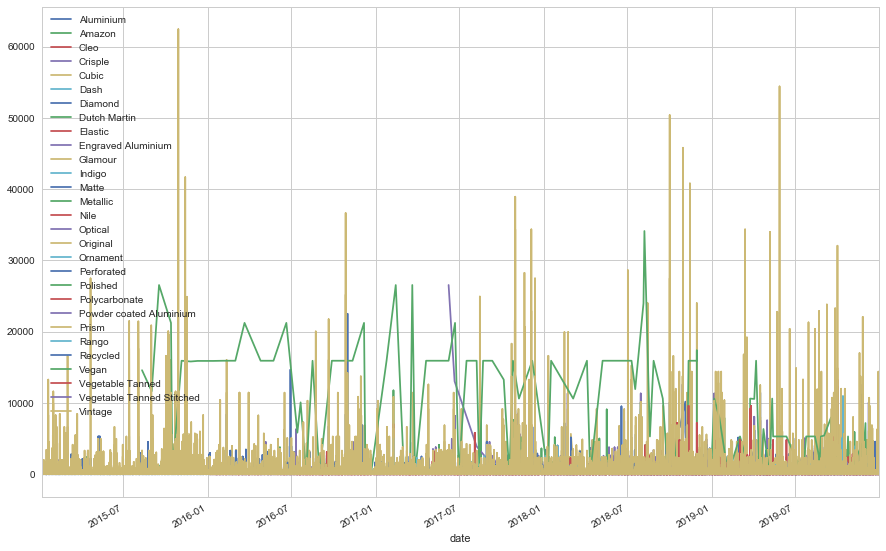

In [184]:
#The graph below plots all 29 categories of type of materials.However, this graph is cluttered and is not clear
fig, ax = plt.subplots()
plt.rcParams['figure.figsize']=(15,10)
plt.style.use('seaborn-whitegrid')
for key, data in df_clean.groupby('type_of_material'):
    data.plot(x='date', y='amount', ax=ax, label=key)

In [127]:
#due to the issue of cluttering in the graph above, we seek to investigate trend of each material for example dutch martin material
#filter to only dutch martin material transactions
dutchmartin_df =df_clean[(df_clean.type_of_material == 'Dutch Martin')]                                       

In [128]:
dutchmartin_df.head()

,internal_id,document_number,date,date_created,customer_name,customer_category,retailer_role,shipping_address_1,shipping_address_2,shipping_city,shipping_zip,shipping_state/province,shipping_country,item,display_name,quantity,amount,amount_foreign_currency,pim_category,type_of_material,pim_colour,wsl,while_stock_lasts,cardprotector_colour,year
104654,299154,I-168291,2016-06-22,2016-06-22 13:09:00,C-9890 Secrid - Give away,Secrid Employee,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands,MDM-Nightblue,Miniwallet Dutch Martin Nightblue,1,28.19,28.19,Miniwallet,Dutch Martin,Blue,No,No,Black,2016
105547,300224,I-168356,2016-06-22,2016-06-22 20:15:00,C-6962 SBO Distributors ltd.,Partners,NaN,2195 Shafton Place,NaN,West Vancouver,V7V 3B2,BC,Canada,MDM-Bordeaux,Miniwallet Dutch Martin Bordeaux,2,50.29,72.42,Miniwallet,Dutch Martin,Bordeaux,No,Yes,Black,2016
105548,300224,I-168356,2016-06-22,2016-06-22 20:15:00,C-6962 SBO Distributors ltd.,Partners,NaN,2195 Shafton Place,NaN,West Vancouver,V7V 3B2,BC,Canada,MDM-Nightblue,Miniwallet Dutch Martin Nightblue,2,50.29,72.42,Miniwallet,Dutch Martin,Blue,No,No,Black,2016
105549,300224,I-168356,2016-06-22,2016-06-22 20:15:00,C-6962 SBO Distributors ltd.,Partners,NaN,2195 Shafton Place,NaN,West Vancouver,V7V 3B2,BC,Canada,MDM-Whiskey,Miniwallet Dutch Martin Whiskey,2,50.29,72.42,Miniwallet,Dutch Martin,Whiskey,No,No,Black,2016
105554,300224,I-168356,2016-06-22,2016-06-22 20:15:00,C-6962 SBO Distributors ltd.,Partners,NaN,2195 Shafton Place,NaN,West Vancouver,V7V 3B2,BC,Canada,SDM-Bordeaux,Slimwallet Dutch Martin Bordeaux,2,50.29,72.42,Slimwallet,Dutch Martin,Bordeaux,No,Yes,Black,2016


In [ ]:
plt.rcParams['figure.figsize']=(15,10)
plt.style.use('seaborn-whitegrid')
dutchmartin_df.plot(x='date', y='amount') # General revenue plot of all sales transactions(it is not clear)

In [164]:
# Set date as the index
dutchmartin_df = dutchmartin_df.set_index('date')

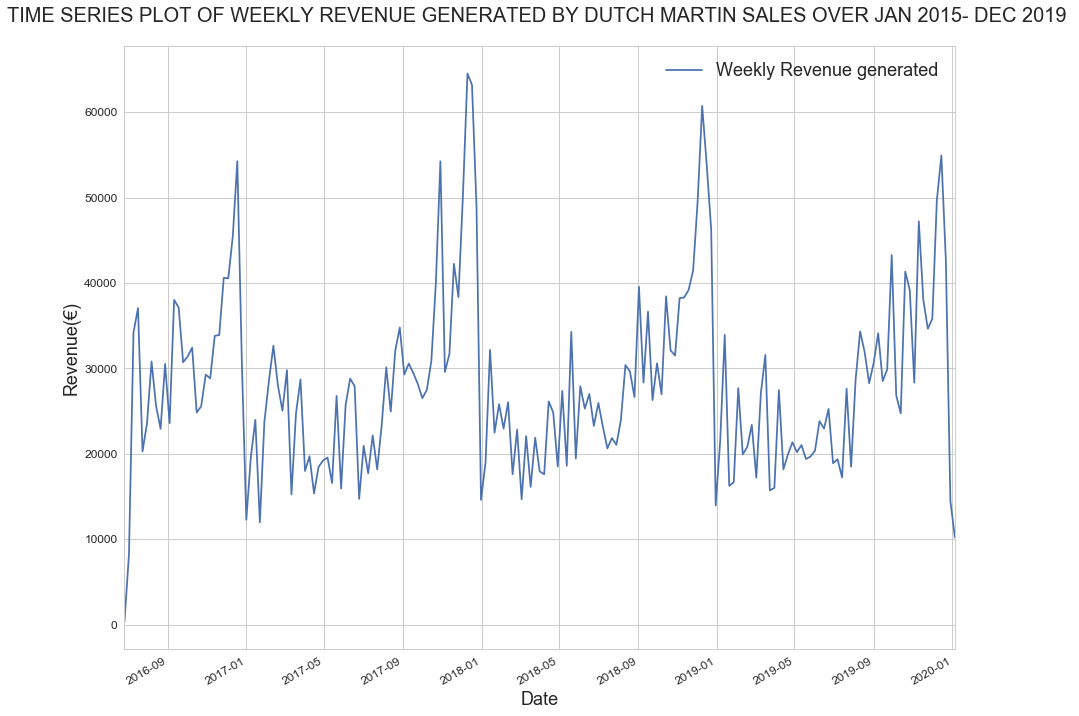

In [182]:
# Plot the data
plt.rcParams['figure.figsize']=(15,10)
plt.style.use('seaborn-whitegrid')
dutchmartin_df.amount.resample('W').sum().plot(linestyle='solid',x_compat=True) #Resample dutch martin data to weekly revenue Data

# Add a legend
plt.legend(['Weekly Revenue generated'],fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue(€)',fontsize=18)
plt.title( 'TIME SERIES PLOT OF WEEKLY REVENUE GENERATED BY DUTCH MARTIN SALES OVER JAN 2015- DEC 2019 ',fontsize=20,y=1.03)
plt.tick_params(labelsize=12)
plt.tight_layout()

<a id='miniwallet'></a>
## MINIWALLET

In [111]:
# Miniwallet display items
miniwalletdf = df_clean[df_clean.display_name.str.contains('Miniwallet')]

In [114]:
miniwalletdf.head() #preview first 5 rows

,internal_id,document_number,date,date_created,customer_name,customer_category,retailer_role,shipping_address_1,shipping_address_2,shipping_city,shipping_zip,shipping_state/province,shipping_country,item,display_name,quantity,amount,amount_foreign_currency,pim_category,type_of_material,pim_colour,wsl,while_stock_lasts,cardprotector_colour,year
12,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,MC-Cobalt,Miniwallet Crisple Cobalt,1,25.19,25.19,NaN,NaN,NaN,No,No,NaN,2015
13,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,MG-Black,Miniwallet Glamour Black,1,25.19,25.19,NaN,NaN,NaN,No,No,NaN,2015
23,30196,I-1510002,2015-01-06,2015-01-06 10:19:00,C-6496 Eug Hoffman,Leather goods,NaN,Av de la Porte Neuve 12,NaN,Luxembourg (Ville),2227,NaN,Luxembourg,M-Black,Miniwallet Original Black,4,91.60,91.60,Miniwallet,Original,Black,No,No,Silver,2015
24,30196,I-1510002,2015-01-06,2015-01-06 10:19:00,C-6496 Eug Hoffman,Leather goods,NaN,Av de la Porte Neuve 12,NaN,Luxembourg (Ville),2227,NaN,Luxembourg,M-Dark brown,Miniwallet Original Dark Brown,3,68.70,68.70,Miniwallet,Original,Dark brown,No,No,Silver,2015
25,30196,I-1510002,2015-01-06,2015-01-06 10:19:00,C-6496 Eug Hoffman,Leather goods,NaN,Av de la Porte Neuve 12,NaN,Luxembourg (Ville),2227,NaN,Luxembourg,MV-Black,Miniwallet Vintage Black,4,91.60,91.60,Miniwallet,Vintage,Black,No,No,Black,2015


In [169]:
# Set date as the index
miniwalletdf = miniwalletdf.set_index('date')

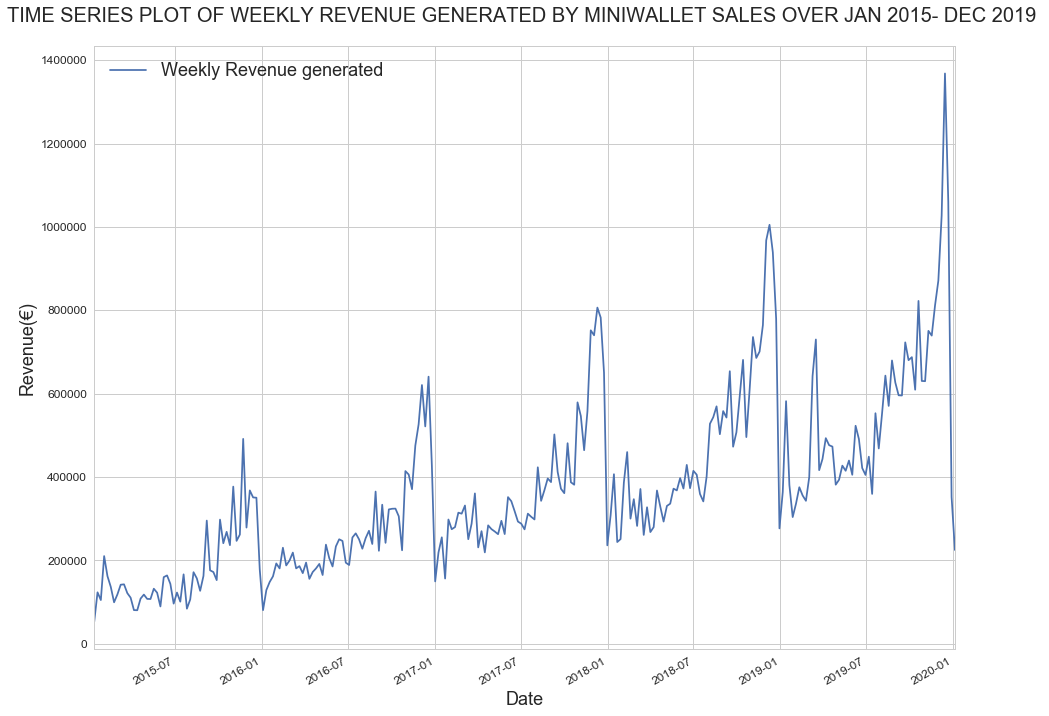

In [181]:
# Plot the data
plt.rcParams['figure.figsize']=(15,10)
plt.style.use('seaborn-whitegrid')
miniwalletdf.amount.resample('W').sum().plot(linestyle='solid',x_compat=True) #Resample dutch martin data to weekly revenue Data

# Add a legend
plt.legend(['Weekly Revenue generated'],fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue(€)',fontsize=18)
plt.title( 'TIME SERIES PLOT OF WEEKLY REVENUE GENERATED BY MINIWALLET SALES OVER JAN 2015- DEC 2019 ',fontsize=20,y=1.03)
plt.tick_params(labelsize=12)
plt.tight_layout()

<a id='miniwallet_table'></a>
## PIVOT TABLE : miniwallet pivot table

In [137]:
#  PIVOT TABLE
miniwallet_table = pd.pivot_table(miniwalletdf, index="display_name",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
miniwallet_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [141]:
#fix column names
miniwallet_table.columns =[s1 + '_' + str(s2) for (s1,s2) in miniwallet_table.columns.tolist()]

In [142]:
#proposed column order
columnsTitles = ['quantity_2015','amount_2015','quantity_2016','amount_2016','quantity_2017','amount_2017','quantity_2018','amount_2018','quantity_2019','amount_2019','quantity_All','amount_All']

In [144]:
#re-arrange column indexes(order) based on above columnsTitles
miniwallet_table = miniwallet_table.reindex(columns=columnsTitles)

In [145]:
#drop first row
miniwallet_table = miniwallet_table.drop(miniwallet_table.index[0])

In [146]:
miniwallet_table

,quantity_2015,amount_2015,quantity_2016,amount_2016,quantity_2017,amount_2017,quantity_2018,amount_2018,quantity_2019,amount_2019,quantity_All,amount_All
display_name,,,,,,,,,,,,
Miniwallet Original Black,75143.00,1599384.69,96678.00,2185042.38,107809.00,2451277.69,113730.00,2603448.83,113240.00,2616573.46,506600,11455727.05
Miniwallet Vintage Black,54055.00,1191610.59,68662.00,1567755.09,80953.00,1850371.60,93025.00,2133114.81,84483.00,1960145.76,381178,8702997.85
Miniwallet Vintage Brown,81577.00,1798526.06,76492.00,1732866.12,74501.00,1690950.91,71904.00,1638341.16,60115.00,1393438.25,364589,8254122.50
Miniwallet Vintage Chocolate,7.00,148.07,45341.00,1040080.08,59552.00,1366693.95,63460.00,1455563.65,59050.00,1373603.14,227410,5236088.89
Miniwallet Original Dark Brown,24547.00,534675.09,28459.00,649922.28,32998.00,750192.00,29465.00,675881.58,31267.00,731214.45,146736,3341885.40
Miniwallet Crisple Black,10523.00,251281.17,16740.00,420453.88,27965.00,704754.67,32580.00,823293.03,32141.00,827641.05,119949,3027423.80
Miniwallet Vintage Blue,17765.00,396635.25,22659.00,514375.97,23874.00,545547.14,27178.00,621995.51,27438.00,635967.20,118914,2714521.07
Miniwallet Vintage Cognac-Rust,nan,nan,nan,nan,20631.00,471644.85,42868.00,980325.90,39206.00,904498.91,102705,2356469.66
Miniwallet Matte Black,nan,nan,nan,nan,nan,nan,24266.00,555309.62,66961.00,1543338.14,91227,2098647.76


<a id='slimwallet'></a>
## SLIMWALLET

In [117]:
# slimwallet display items
slimwalletdf = df_clean[df_clean.display_name.str.contains('Slimwallet')]

In [118]:
slimwalletdf.head()

,internal_id,document_number,date,date_created,customer_name,customer_category,retailer_role,shipping_address_1,shipping_address_2,shipping_city,shipping_zip,shipping_state/province,shipping_country,item,display_name,quantity,amount,amount_foreign_currency,pim_category,type_of_material,pim_colour,wsl,while_stock_lasts,cardprotector_colour,year
14,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,SO-Black,Slimwallet Original Black,1,22.90,22.90,Slimwallet,Original,Black,No,No,Silver,2015
15,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,SV-Black,Slimwallet Vintage Black,2,45.80,45.80,Slimwallet,Vintage,Black,No,No,Black,2015
16,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,SV-Blue Silver,Slimwallet Vintage Blue Silver,2,45.80,45.80,NaN,NaN,NaN,No,No,NaN,2015
17,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,SV-Brown,Slimwallet Vintage Brown,2,45.80,45.80,Slimwallet,Vintage,Brown,No,No,Silver,2015
18,24580,I-1510001,2015-01-05,2015-01-05 16:15:00,C-9255 Rubino di Fabio Della Rocca attn. Spimar,Leather goods,NaN,Via Della Croce 75 A,NaN,Roma,00187,NaN,Italy,SV-Cognac,Slimwallet Vintage Cognac,1,22.90,22.90,Slimwallet,Vintage,Brown,No,No,Silver,2015


In [172]:
# Set date as the index
slimwalletdf = slimwalletdf.set_index('date')

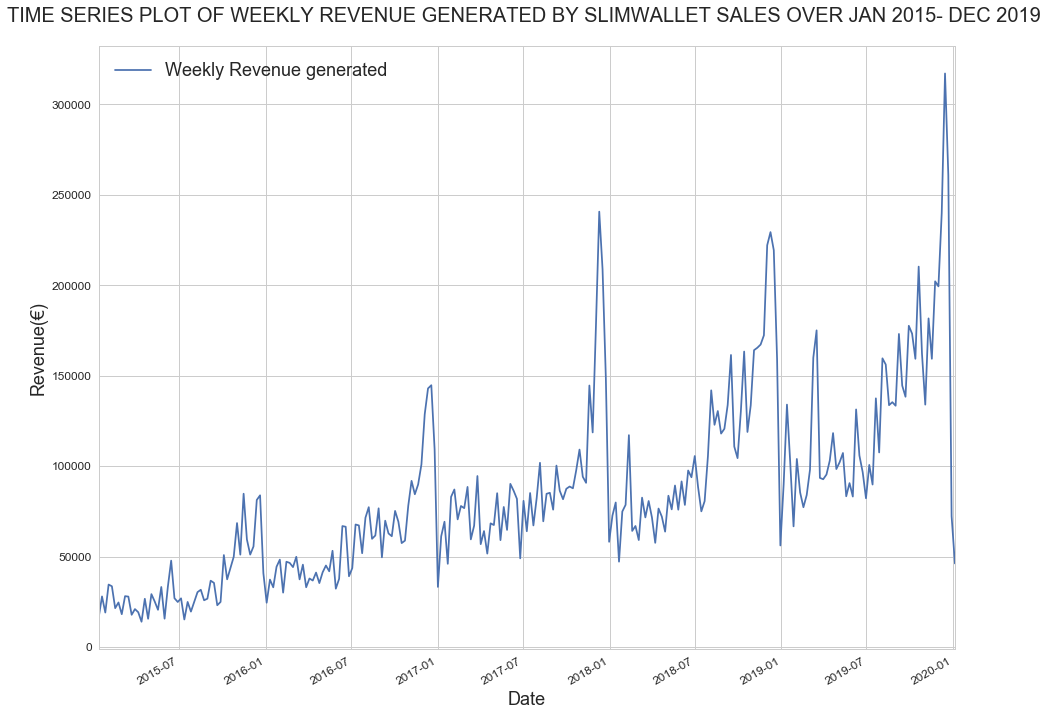

In [183]:
# Plot the data
plt.rcParams['figure.figsize']=(15,10)
plt.style.use('seaborn-whitegrid')
slimwalletdf.amount.resample('W').sum().plot(linestyle='solid',x_compat=True) #Resample dutch martin data to weekly revenue Data

# Add a legend
plt.legend(['Weekly Revenue generated'],fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue(€)',fontsize=18)
plt.title( 'TIME SERIES PLOT OF WEEKLY REVENUE GENERATED BY SLIMWALLET SALES OVER JAN 2015- DEC 2019 ',fontsize=20,y=1.03)
plt.tick_params(labelsize=12)
plt.tight_layout()

<a id='slimwallet_table'></a>
## PIVOT TABLE : slimwallet pivot table

In [147]:
#  PIVOT TABLE
slimwallet_table = pd.pivot_table(slimwalletdf, index="display_name",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
slimwallet_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [149]:
#fix column names
slimwallet_table.columns =[s1 + '_' + str(s2) for (s1,s2) in slimwallet_table.columns.tolist()]

In [150]:
#proposed column order
columnsTitles = ['quantity_2015','amount_2015','quantity_2016','amount_2016','quantity_2017','amount_2017','quantity_2018','amount_2018','quantity_2019','amount_2019','quantity_All','amount_All']

In [151]:
#re-arrange column indexes(order) based on above columnsTitles
slimwallet_table = slimwallet_table.reindex(columns=columnsTitles)

In [152]:
#drop first row
slimwallet_table = slimwallet_table.drop(slimwallet_table.index[0])

In [153]:
slimwallet_table

,quantity_2015,amount_2015,quantity_2016,amount_2016,quantity_2017,amount_2017,quantity_2018,amount_2018,quantity_2019,amount_2019,quantity_All,amount_All
display_name,,,,,,,,,,,,
Slimwallet Vintage Black,19160.00,437322.32,27800.00,636752.59,31945.00,736545.87,35572.00,830516.16,28763.00,700583.36,143240,3341720.30
Slimwallet Original Black,15433.00,349631.08,24886.00,582085.61,33831.00,793002.38,31054.00,720660.33,30227.00,724739.27,135431,3170118.67
Slimwallet Vintage Brown,24581.00,548402.88,24889.00,574239.96,26299.00,617239.38,26033.00,616086.91,20285.00,485987.46,122087,2841956.59
Slimwallet Vintage Chocolate,7.00,148.07,17403.00,407138.06,23099.00,548086.85,27815.00,654771.70,21870.00,530229.81,90194,2140374.49
Slimwallet Matte Black,nan,nan,nan,nan,nan,nan,8876.00,211259.32,19633.00,475717.31,28509,686976.63
Slimwallet Crisple Black,nan,nan,nan,nan,8303.00,213334.68,9704.00,247571.25,8109.00,218559.22,26116,679465.15
Slimwallet Dutch Martin Whiskey,nan,nan,3276.00,93678.60,5050.00,153839.25,5298.00,165964.41,4947.00,165192.59,18571,578674.85
Slimwallet Rango Blue-Titanium,nan,nan,nan,nan,6119.00,161011.17,7300.00,196765.93,6110.00,171452.01,19529,529229.11
Slimwallet Dutch Martin Nightblue,nan,nan,3004.00,83494.04,6044.00,165823.58,4666.00,139432.51,3367.00,104399.87,17081,493150.00


<a id='twinwallet'></a>
## TWINWALLET

In [121]:
# slimwallet display items
twinwalletdf = df_clean[df_clean.display_name.str.contains('Twinwallet')]

In [122]:
twinwalletdf.head()

,internal_id,document_number,date,date_created,customer_name,customer_category,retailer_role,shipping_address_1,shipping_address_2,shipping_city,shipping_zip,shipping_state/province,shipping_country,item,display_name,quantity,amount,amount_foreign_currency,pim_category,type_of_material,pim_colour,wsl,while_stock_lasts,cardprotector_colour,year
0,24560,I-1510000,2015-01-05,2015-01-05 12:35:00,C-9855 SkilledIn,Promotional sales - End user,NaN,"Scheepsbouwweg 8, K11",NaN,Rotterdam,3089 JW,NaN,Netherlands,TA-Brown,Twinwallet Amazon Brown,1,54.26,54.26,Twinwallet,Amazon,Brown,No,No,Silver,2015
32,30196,I-1510002,2015-01-06,2015-01-06 10:19:00,C-6496 Eug Hoffman,Leather goods,NaN,Av de la Porte Neuve 12,NaN,Luxembourg (Ville),2227,NaN,Luxembourg,TO-Black,Twinwallet Original Black,1,33.90,33.90,Twinwallet,Original,Black,No,No,Silver,2015
33,30196,I-1510002,2015-01-06,2015-01-06 10:19:00,C-6496 Eug Hoffman,Leather goods,NaN,Av de la Porte Neuve 12,NaN,Luxembourg (Ville),2227,NaN,Luxembourg,TV-Black,Twinwallet Vintage Black,1,33.90,33.90,Twinwallet,Vintage,Black,No,No,Black,2015
46,30197,I-1510003,2015-01-06,2015-01-06 10:20:00,C-6547 ALCO Lederwaren Lier BVBA,Leather goods,NaN,Antwerpsestraat 112,NaN,Lier,2500,NaN,Belgium,TV-Black,Twinwallet Vintage Black,1,33.90,33.90,Twinwallet,Vintage,Black,No,No,Black,2015
47,30197,I-1510003,2015-01-06,2015-01-06 10:20:00,C-6547 ALCO Lederwaren Lier BVBA,Leather goods,NaN,Antwerpsestraat 112,NaN,Lier,2500,NaN,Belgium,TV-Brown,Twinwallet Vintage Brown,1,33.90,33.90,Twinwallet,Vintage,Brown,No,No,Silver,2015


In [174]:
# Set date as the index
twinwalletdf = twinwalletdf.set_index('date')

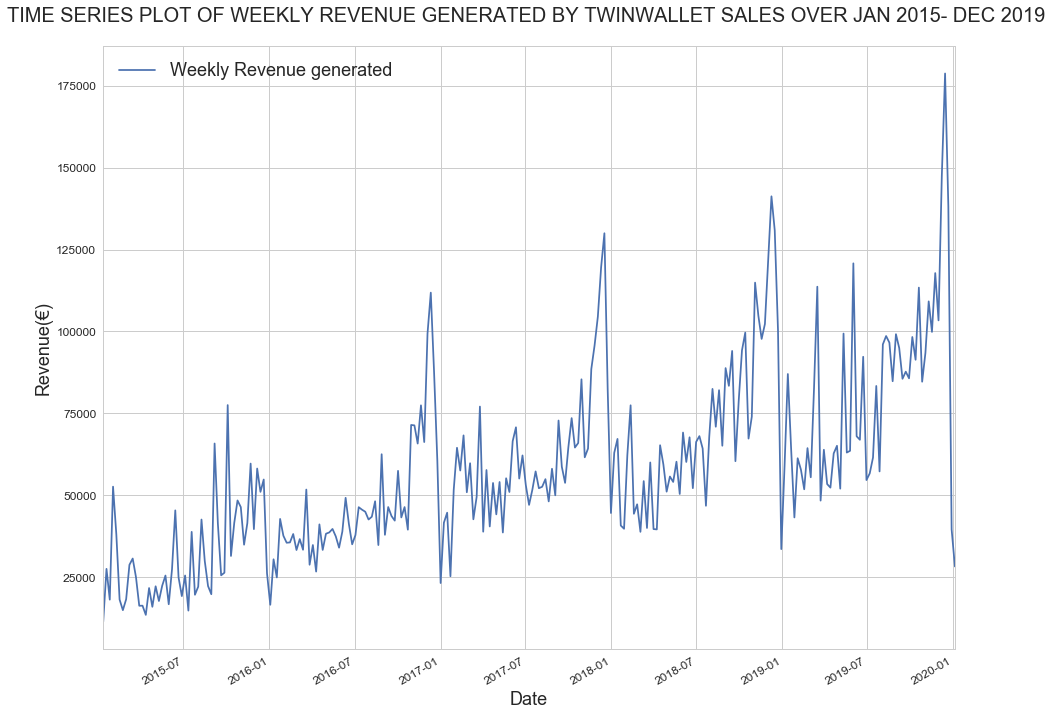

In [177]:
# Plot the data
plt.rcParams['figure.figsize']=(15,10)
plt.style.use('seaborn-whitegrid')
twinwalletdf.amount.resample('W').sum().plot(linestyle='solid',x_compat=True) #Resample dutch martin data to weekly revenue Data

# Add a legend
plt.legend(['Weekly Revenue generated'],fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue(€)',fontsize=18)
plt.title( 'TIME SERIES PLOT OF WEEKLY REVENUE GENERATED BY TWINWALLET SALES OVER JAN 2015- DEC 2019 ',fontsize=20,y=1.03)
plt.tick_params(labelsize=12)
plt.tight_layout()

<a id='twinwallet_table'></a>
## PIVOT TABLE : twinwallet pivot table

In [154]:
#  PIVOT TABLE
twinwallet_table = pd.pivot_table(twinwalletdf, index="display_name",columns='year',
                              values =["amount","quantity"],aggfunc=sum, margins=True)

#sort the pivot table
twinwallet_table.sort_values(by=('amount','All'), ascending=False, inplace= True)

In [156]:
#fix column names
twinwallet_table.columns =[s1 + '_' + str(s2) for (s1,s2) in twinwallet_table.columns.tolist()]

In [157]:
#proposed column order
columnsTitles = ['quantity_2015','amount_2015','quantity_2016','amount_2016','quantity_2017','amount_2017','quantity_2018','amount_2018','quantity_2019','amount_2019','quantity_All','amount_All']

In [158]:
#re-arrange column indexes(order) based on above columnsTitles
twinwallet_table = twinwallet_table.reindex(columns=columnsTitles)

In [159]:
#drop first row
twinwallet_table = twinwallet_table.drop(twinwallet_table.index[0])

In [160]:
twinwallet_table

,quantity_2015,amount_2015,quantity_2016,amount_2016,quantity_2017,amount_2017,quantity_2018,amount_2018,quantity_2019,amount_2019,quantity_All,amount_All
display_name,,,,,,,,,,,,
Twinwallet Original Black,13110.00,411410.52,15408.00,525246.56,19314.00,651812.66,21403.00,717467.03,20812.00,707866.57,90047,3013803.34
Twinwallet Vintage Black,8939.00,298697.57,11552.00,393836.90,15622.00,530496.52,18045.00,618816.40,17451.00,601768.32,71609,2443615.71
Twinwallet Vintage Brown,11432.00,375414.35,11946.00,404427.42,13488.00,462233.52,14136.00,481323.35,12604.00,433393.77,63606,2156792.41
Twinwallet Vintage Chocolate,7.00,220.76,7546.00,258409.02,12289.00,418143.92,13900.00,469439.91,13762.00,473640.99,47504,1619854.60
Twinwallet Crisple Black,nan,nan,nan,nan,6185.00,223223.05,8420.00,290882.42,7516.00,268757.46,22121,782862.93
Twinwallet Original Red-Red,nan,nan,nan,nan,3006.00,100497.87,5249.00,179852.72,5035.00,174993.54,13290,455344.13
Twinwallet Dutch Martin Whiskey,nan,nan,nan,nan,3711.00,148442.19,3738.00,148527.44,3388.00,140564.38,10837,437534.01
Twinwallet Nile Black,nan,nan,1788.00,67939.30,3321.00,127254.16,3312.00,127390.59,2554.00,103721.96,10975,426306.01
Twinwallet Original Cognac-Brown,nan,nan,nan,nan,46.00,2302.76,5547.00,191682.24,3206.00,112917.89,8799,306902.89
